In [7]:
import pandas as pd
import plotly.express as px
from dash import Dash, dcc, html, Input, Output
import dash_bootstrap_components as dbc

In [8]:
df = pd.read_csv(r"C:\Users\hamid\Downloads\logdata.csv") # آدرس فایل دیتاست را وارد کنید
df
df2 = df

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  100000 non-null  int64 
 1   Timestamp   100000 non-null  object
 2   LogLevel    100000 non-null  object
 3   Service     100000 non-null  object
 4   Message     100000 non-null  object
 5   RequestID   100000 non-null  int64 
 6   User        100000 non-null  object
 7   ClientIP    100000 non-null  object
 8   TimeTaken   100000 non-null  object
dtypes: int64(2), object(7)
memory usage: 6.9+ MB


In [10]:
df.describe()

,Unnamed: 0,RequestID
count,100000.000000,100000.000000
mean,49999.500000,5499.406040
std,28867.657797,2598.164008
min,0.000000,1000.000000
25%,24999.750000,3243.000000
50%,49999.500000,5502.000000
75%,74999.250000,7756.000000
max,99999.000000,9999.000000


In [11]:
df.isnull().sum()

Unnamed: 0    0
Timestamp     0
LogLevel      0
Service       0
Message       0
RequestID     0
User          0
ClientIP      0
TimeTaken     0
dtype: int64

In [12]:
df.shape

(100000, 9)

In [13]:
# بررسی میزان مقادیر گمشده
missing = df.isnull().sum().sort_values(ascending=False)
print("Missing Values per Column:")
print(missing)

# درصد مقادیر گمشده
percent_missing = (missing / len(df)) * 100
print("\nPercentage of Missing Values:")
print(percent_missing)


Missing Values per Column:
Unnamed: 0    0
Timestamp     0
LogLevel      0
Service       0
Message       0
RequestID     0
User          0
ClientIP      0
TimeTaken     0
dtype: int64

Percentage of Missing Values:
Unnamed: 0    0.0
Timestamp     0.0
LogLevel      0.0
Service       0.0
Message       0.0
RequestID     0.0
User          0.0
ClientIP      0.0
TimeTaken     0.0
dtype: float64


In [14]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')

# بررسی رکوردهایی که زمان نامعتبر دارند
invalid_timestamps = df[df['Timestamp'].isnull()]
print(f"Invalid timestamps found: {len(invalid_timestamps)}")

Invalid timestamps found: 0


In [15]:
# تبدیل نام سرویس‌ها و سطح لاگ به حروف بزرگ یا کوچک ثابت
df['Service'] = df['Service'].str.strip().str.lower()

df['LogLevel'] = df['LogLevel'].str.strip().str.upper()


In [16]:
df

,Unnamed: 0,Timestamp,LogLevel,Service,Message,RequestID,User,ClientIP,TimeTaken
0,0,2023-11-20 08:40:50.664842,WARNING,servicea,Performance Warnings,6743,User96,192.168.1.102,28ms
1,1,2023-11-20 08:40:50.672154,DEBUG,servicea,File I/O,8684,User17,192.168.1.219,55ms
2,2,2023-11-20 08:40:50.680263,WARNING,servicea,Performance Warnings,6265,User13,192.168.1.173,44ms
3,3,2023-11-20 08:40:50.688973,ERROR,servicea,Critical Errors,5821,User1,192.168.1.185,72ms
4,4,2023-11-20 08:40:50.697002,ERROR,serviceb,Critical Errors,7272,User64,192.168.1.194,56ms
...,...,...,...,...,...,...,...,...,...
99995,99995,2023-11-20 09:04:19.566907,WARNING,serviced,Resource Warnings,5111,User22,192.168.1.180,32ms
99996,99996,2023-11-20 09:04:19.583197,FATAL,servicec,Data Corruption,3330,User72,192.168.1.49,50ms
99997,99997,2023-11-20 09:04:19.592874,INFO,serviced,Startup Messages,5527,User76,192.168.1.223,12ms
99998,99998,2023-11-20 09:04:19.608640,ERROR,servicec,Database Errors,4146,User20,192.168.1.80,90ms


In [17]:
# حذف ردیف‌هایی که همه مقادیرشان NaN هستند
df.dropna(how='all', inplace=True)

# حذف پیام‌های خالی یا خیلی کوتاه (مثل فقط یک کاراکتر)
df = df[df['Message'].str.len() > 2]


In [18]:
if 'LogLevel' in df.columns:
    print("\nLog level counts:")
    print(df['LogLevel'].value_counts())

if 'Service' in df.columns:
    print("\nLogs per service:")
    print(df['Service'].value_counts())



Log level counts:
LogLevel
WARNING    26181
DEBUG      25901
INFO       20142
ERROR      15851
FATAL      11925
Name: count, dtype: int64

Logs per service:
Service
servicec    25200
serviced    25139
servicea    24886
serviceb    24775
Name: count, dtype: int64


In [19]:
unique_units = df["TimeTaken"].dropna().astype(str).str.extract(r'([a-zA-Z]+)')[0].value_counts()
print("\nUnits found in 'time taken' column:")
print(unique_units)


Units found in 'time taken' column:
0
ms    100000
Name: count, dtype: int64


In [20]:
df["TimeTaken"] = df["TimeTaken"].astype(str).str.replace('ms', '', regex=False).str.strip()
df["TimeTaken"] = pd.to_numeric(df["TimeTaken"], errors='coerce')

In [21]:
df

,Unnamed: 0,Timestamp,LogLevel,Service,Message,RequestID,User,ClientIP,TimeTaken
0,0,2023-11-20 08:40:50.664842,WARNING,servicea,Performance Warnings,6743,User96,192.168.1.102,28
1,1,2023-11-20 08:40:50.672154,DEBUG,servicea,File I/O,8684,User17,192.168.1.219,55
2,2,2023-11-20 08:40:50.680263,WARNING,servicea,Performance Warnings,6265,User13,192.168.1.173,44
3,3,2023-11-20 08:40:50.688973,ERROR,servicea,Critical Errors,5821,User1,192.168.1.185,72
4,4,2023-11-20 08:40:50.697002,ERROR,serviceb,Critical Errors,7272,User64,192.168.1.194,56
...,...,...,...,...,...,...,...,...,...
99995,99995,2023-11-20 09:04:19.566907,WARNING,serviced,Resource Warnings,5111,User22,192.168.1.180,32
99996,99996,2023-11-20 09:04:19.583197,FATAL,servicec,Data Corruption,3330,User72,192.168.1.49,50
99997,99997,2023-11-20 09:04:19.592874,INFO,serviced,Startup Messages,5527,User76,192.168.1.223,12
99998,99998,2023-11-20 09:04:19.608640,ERROR,servicec,Database Errors,4146,User20,192.168.1.80,90


In [22]:
print("\nCleaned 'time taken' column:")
print(df["TimeTaken"].head())
print("\nColumn type:", df["TimeTaken"].dtype)


Cleaned 'time taken' column:
0    28
1    55
2    44
3    72
4    56
Name: TimeTaken, dtype: int64

Column type: int64


In [23]:
df['Timestamp'] = df['Timestamp'].dt.tz_localize('UTC').dt.tz_convert('Asia/Tehran')

In [24]:
df

,Unnamed: 0,Timestamp,LogLevel,Service,Message,RequestID,User,ClientIP,TimeTaken
0,0,2023-11-20 12:10:50.664842+03:30,WARNING,servicea,Performance Warnings,6743,User96,192.168.1.102,28
1,1,2023-11-20 12:10:50.672154+03:30,DEBUG,servicea,File I/O,8684,User17,192.168.1.219,55
2,2,2023-11-20 12:10:50.680263+03:30,WARNING,servicea,Performance Warnings,6265,User13,192.168.1.173,44
3,3,2023-11-20 12:10:50.688973+03:30,ERROR,servicea,Critical Errors,5821,User1,192.168.1.185,72
4,4,2023-11-20 12:10:50.697002+03:30,ERROR,serviceb,Critical Errors,7272,User64,192.168.1.194,56
...,...,...,...,...,...,...,...,...,...
99995,99995,2023-11-20 12:34:19.566907+03:30,WARNING,serviced,Resource Warnings,5111,User22,192.168.1.180,32
99996,99996,2023-11-20 12:34:19.583197+03:30,FATAL,servicec,Data Corruption,3330,User72,192.168.1.49,50
99997,99997,2023-11-20 12:34:19.592874+03:30,INFO,serviced,Startup Messages,5527,User76,192.168.1.223,12
99998,99998,2023-11-20 12:34:19.608640+03:30,ERROR,servicec,Database Errors,4146,User20,192.168.1.80,90


In [25]:
print(df.describe(include='all'))
print(df.head())


           Unnamed: 0                            Timestamp LogLevel   Service  \
count   100000.000000                               100000   100000    100000   
unique            NaN                                  NaN        5         4   
top               NaN                                  NaN  WARNING  servicec   
freq              NaN                                  NaN    26181     25200   
mean     49999.500000  2023-11-20 12:22:41.509114112+03:30      NaN       NaN   
min          0.000000     2023-11-20 12:10:50.664842+03:30      NaN       NaN   
25%      24999.750000  2023-11-20 12:16:48.521445376+03:30      NaN       NaN   
50%      49999.500000  2023-11-20 12:22:46.691981056+03:30      NaN       NaN   
75%      74999.250000  2023-11-20 12:28:35.337382656+03:30      NaN       NaN   
max      99999.000000     2023-11-20 12:34:19.624710+03:30      NaN       NaN   
std      28867.657797                                  NaN      NaN       NaN   

               Message     

In [26]:
df["Timestamp"] = pd.to_datetime(df["Timestamp"], errors='coerce')

# بررسی چند نمونه از داده‌های زمانی
print("چند نمونه از ستون زمان:")
print(df["Timestamp"].head())

# بررسی اینکه آیا زمان‌ها timezone دارند یا خیر
has_tz = df["Timestamp"].dt.tz is not None
print("\nآیا زمان‌ها timezone دارند؟", has_tz)

if not has_tz:
    print("زمان‌ها timezone مشخصی ندارند (ناحیه زمانی در داده‌ها وجود ندارد).")
else:
    # اگر timezone دارند، بررسی کن چند نوع مختلف وجود دارد
    tz_values = df["Timestamp"].dropna().map(lambda x: x.tzinfo).value_counts()
    print("\nانواع timezone موجود در داده:")
    print(tz_values)

چند نمونه از ستون زمان:
0   2023-11-20 12:10:50.664842+03:30
1   2023-11-20 12:10:50.672154+03:30
2   2023-11-20 12:10:50.680263+03:30
3   2023-11-20 12:10:50.688973+03:30
4   2023-11-20 12:10:50.697002+03:30
Name: Timestamp, dtype: datetime64[ns, Asia/Tehran]

آیا زمان‌ها timezone دارند؟ True

انواع timezone موجود در داده:
Timestamp
Asia/Tehran    100000
Name: count, dtype: int64


In [27]:
is_sorted = df['Timestamp'].is_monotonic_increasing
print("آیا زمان‌ها به ترتیب هستند؟", is_sorted)

آیا زمان‌ها به ترتیب هستند؟ True


In [28]:
#df.sort_values(by='timestamp', inplace=True) اگر مرتب نبود

In [29]:
print(df[df['TimeTaken'] < 0])

Empty DataFrame
Columns: [Unnamed: 0, Timestamp, LogLevel, Service, Message, RequestID, User, ClientIP, TimeTaken]
Index: []


In [30]:
print("تعداد کل رکوردها:", len(df))
print("بازه زمانی داده‌ها:", df["Timestamp"].min(), " تا ", df["Timestamp"].max())
print("سرویس‌های موجود:", df["Service"].nunique())
print("سطوح لاگ:", df["LogLevel"].unique())

تعداد کل رکوردها: 100000
بازه زمانی داده‌ها: 2023-11-20 12:10:50.664842+03:30  تا  2023-11-20 12:34:19.624710+03:30
سرویس‌های موجود: 4
سطوح لاگ: ['WARNING' 'DEBUG' 'ERROR' 'FATAL' 'INFO']


In [31]:
service_counts = df["Service"].value_counts()
print("\nتعداد لاگ‌ها در هر سرویس:")
print(service_counts)


تعداد لاگ‌ها در هر سرویس:
Service
servicec    25200
serviced    25139
servicea    24886
serviceb    24775
Name: count, dtype: int64


In [32]:
df["UserId"] = df["User"].astype(str).str.replace("User", "", regex=False).astype(int)

print(df[["User", "UserId"]].head())

     User  UserId
0  User96      96
1  User17      17
2  User13      13
3   User1       1
4  User64      64


In [33]:
df

,Unnamed: 0,Timestamp,LogLevel,Service,Message,RequestID,User,ClientIP,TimeTaken,UserId
0,0,2023-11-20 12:10:50.664842+03:30,WARNING,servicea,Performance Warnings,6743,User96,192.168.1.102,28,96
1,1,2023-11-20 12:10:50.672154+03:30,DEBUG,servicea,File I/O,8684,User17,192.168.1.219,55,17
2,2,2023-11-20 12:10:50.680263+03:30,WARNING,servicea,Performance Warnings,6265,User13,192.168.1.173,44,13
3,3,2023-11-20 12:10:50.688973+03:30,ERROR,servicea,Critical Errors,5821,User1,192.168.1.185,72,1
4,4,2023-11-20 12:10:50.697002+03:30,ERROR,serviceb,Critical Errors,7272,User64,192.168.1.194,56,64
...,...,...,...,...,...,...,...,...,...,...
99995,99995,2023-11-20 12:34:19.566907+03:30,WARNING,serviced,Resource Warnings,5111,User22,192.168.1.180,32,22
99996,99996,2023-11-20 12:34:19.583197+03:30,FATAL,servicec,Data Corruption,3330,User72,192.168.1.49,50,72
99997,99997,2023-11-20 12:34:19.592874+03:30,INFO,serviced,Startup Messages,5527,User76,192.168.1.223,12,76
99998,99998,2023-11-20 12:34:19.608640+03:30,ERROR,servicec,Database Errors,4146,User20,192.168.1.80,90,20


In [34]:
df["is_error"] = (df["LogLevel"] == "ERROR").astype(int)

corr = df[["TimeTaken", "is_error"]].corr()
print("ضریب همبستگی بین خطا و زمان پاسخ:")
print(corr)

ضریب همبستگی بین خطا و زمان پاسخ:
           TimeTaken  is_error
TimeTaken   1.000000  0.001805
is_error    0.001805  1.000000


In [36]:
#trace_counts = df.groupby("TraceId")["ServiceName"].nunique()
#print("میانگین تعداد سرویس‌ها در هر Trace:", trace_counts.mean())

In [37]:
summary = df.groupby("Service").agg({
    "TimeTaken": "mean",
    "is_error": "sum"
}).sort_values(by=["is_error", "TimeTaken"], ascending=False)

print(summary.head())

          TimeTaken  is_error
Service                      
serviced  54.872191      4056
servicec  55.025635      3995
servicea  55.197179      3917
serviceb  55.120969      3883


In [38]:
df

,Unnamed: 0,Timestamp,LogLevel,Service,Message,RequestID,User,ClientIP,TimeTaken,UserId,is_error
0,0,2023-11-20 12:10:50.664842+03:30,WARNING,servicea,Performance Warnings,6743,User96,192.168.1.102,28,96,0
1,1,2023-11-20 12:10:50.672154+03:30,DEBUG,servicea,File I/O,8684,User17,192.168.1.219,55,17,0
2,2,2023-11-20 12:10:50.680263+03:30,WARNING,servicea,Performance Warnings,6265,User13,192.168.1.173,44,13,0
3,3,2023-11-20 12:10:50.688973+03:30,ERROR,servicea,Critical Errors,5821,User1,192.168.1.185,72,1,1
4,4,2023-11-20 12:10:50.697002+03:30,ERROR,serviceb,Critical Errors,7272,User64,192.168.1.194,56,64,1
...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,2023-11-20 12:34:19.566907+03:30,WARNING,serviced,Resource Warnings,5111,User22,192.168.1.180,32,22,0
99996,99996,2023-11-20 12:34:19.583197+03:30,FATAL,servicec,Data Corruption,3330,User72,192.168.1.49,50,72,0
99997,99997,2023-11-20 12:34:19.592874+03:30,INFO,serviced,Startup Messages,5527,User76,192.168.1.223,12,76,0
99998,99998,2023-11-20 12:34:19.608640+03:30,ERROR,servicec,Database Errors,4146,User20,192.168.1.80,90,20,1


In [39]:
print(df["Timestamp"].head())
print(df["Timestamp"].dtype)


0   2023-11-20 12:10:50.664842+03:30
1   2023-11-20 12:10:50.672154+03:30
2   2023-11-20 12:10:50.680263+03:30
3   2023-11-20 12:10:50.688973+03:30
4   2023-11-20 12:10:50.697002+03:30
Name: Timestamp, dtype: datetime64[ns, Asia/Tehran]
datetime64[ns, Asia/Tehran]


In [40]:
print(df2.columns.tolist())


['Unnamed: 0', 'Timestamp', 'LogLevel', 'Service', 'Message', 'RequestID', 'User', 'ClientIP', 'TimeTaken']


In [41]:
print(df.columns)


Index(['Unnamed: 0', 'Timestamp', 'LogLevel', 'Service', 'Message',
       'RequestID', 'User', 'ClientIP', 'TimeTaken', 'UserId', 'is_error'],
      dtype='object')


In [42]:
import plotly.io as pio
pio.renderers.default = "browser"


In [43]:
import plotly.express as px

log_counts = df["LogLevel"].value_counts()

fig1 = px.bar(
    x=log_counts.index,
    y=log_counts.values,
    title="توزیع سطوح لاگ",
    labels={"x": "Log Level", "y": "تعداد"},
    text=log_counts.values,
    color=log_counts.index,
    #color_discrete_sequence=px.colors.qualitative.Set2,
    #color_discrete_sequence=px.colors.qualitative.Prism
    #color_discrete_sequence=px.colors.qualitative.Pastel1
    color_discrete_sequence=px.colors.qualitative.Dark2
)

fig1.update_traces(textposition="outside")

fig1.update_layout(
    plot_bgcolor="#f9f9f9",
    paper_bgcolor="#ffffff",
    title_font_size=18,
    xaxis_title="سطح لاگ",
    yaxis_title="تعداد",
    showlegend=False,
    title_x=0.5
)

fig1.show()


In [44]:
import pandas as pd
import plotly.express as px

df["Timestamp"] = pd.to_datetime(df["Timestamp"], errors="coerce")

df = df.set_index("Timestamp")

log_per_hour = df.resample("1h")["Message"].count().reset_index()
log_per_hour.columns = ["Timestamp", "LogCount"]

fig = px.line(
    log_per_hour,
    x="Timestamp",
    y="LogCount",
    title="نرخ تولید لاگ در طول زمان (ساعتی)",
    labels={"Timestamp": "زمان", "LogCount": "تعداد لاگ در هر ساعت"},
)

fig.update_traces(mode="lines+markers")       
fig.update_layout(
    xaxis_title="زمان",
    yaxis_title="تعداد لاگ‌ها در ساعت",
    template="plotly_white",
    hovermode="x unified",
    title_x=0.5
)

fig.show()

In [45]:
import plotly.express as px
df2["Timestamp"] = pd.to_datetime(df2["Timestamp"], errors="coerce")
df2 = df2.set_index("Timestamp")

error_df = df2[df2["LogLevel"] == "ERROR"]

# گروه‌بندی ساعتی
error_per_hour = error_df.resample("1h")["Message"].count().reset_index()
error_per_hour.columns = ["Timestamp", "ErrorCount"]

# رسم نمودار
fig2 = px.line(
    error_per_hour,
    x="Timestamp",
    y="ErrorCount",
    title="نرخ خطا در طول زمان",
    labels={"Timestamp": "زمان", "ErrorCount": "تعداد خطا در هر ساعت"},
)

fig2.update_traces(line_color="red", mode="lines+markers")
fig2.update_layout(
    template="plotly_white",
    hovermode="x unified",
    xaxis_title="زمان",
    yaxis_title="تعداد خطا",
    title_x=0.5
)

fig2.show()

In [46]:
import plotly.express as px

fig = px.histogram(
    df,
    x="TimeTaken",
    nbins=50,
    title="توزیع زمان پاسخ",
    labels={"TimeTaken": "زمان پاسخ (ms)", "count": "تعداد رخدادها"},
    color_discrete_sequence=px.colors.qualitative.Dark2
)

fig.update_traces(marker_line_width=1, marker_line_color="black")
fig.update_layout(template="plotly_white", bargap=0.05, title_x=0.5, yaxis_title="تعداد رخدادها")

fig.show()

In [47]:
import plotly.express as px

# محاسبه تعداد خطاها بر اساس سرویس
error_counts = (
    df[df["LogLevel"] == "ERROR"]
    .groupby("Service")["Message"]
    .count()
    .reset_index()
    .sort_values(by="Message", ascending=False)
)

fig = px.bar(
    error_counts,
    x="Service",
    y="Message",
    title="تعداد خطاها به ازای هر سرویس",
    labels={"Service": "نام سرویس", "Message": "تعداد خطاها"},
    color="Service",
    color_discrete_sequence=px.colors.qualitative.Dark2
)

fig.update_traces(marker_line_color="black")
fig.update_layout(
    template="plotly_white",
    xaxis_tickangle=-45,
    yaxis_title="تعداد خطاها",
    hovermode="x",
    title_x=0.5,
    showlegend=False
)

fig.show()

In [48]:
import pandas as pd
import plotly.express as px

df.index = pd.to_datetime(df.index, errors="coerce")

# استخراج ساعت
df["Hour"] = df.index.hour

# شمارش خطاها
error_by_hour = (
    df[df["LogLevel"] == "ERROR"]["Hour"]
    .value_counts()
    .sort_index()
    .reset_index()
)

error_by_hour.columns = ["Hour", "ErrorCount"]

fig = px.bar(
    error_by_hour,
    x="Hour",
    y="ErrorCount",
    title="الگوی ساعتی وقوع خطا",
    labels={"Hour": "ساعت روز", "ErrorCount": "تعداد خطا"},
    color_discrete_sequence=px.colors.qualitative.Dark2
)

fig.update_traces(marker_color="crimson", marker_line_color="black")
fig.update_layout(
    template="plotly_white",
    xaxis=dict(dtick=1),
    yaxis_title="تعداد خطا",
    hovermode="x",
    title_x=0.5,
)

fig.show()


In [49]:
import plotly.express as px

# ساخت ستون شمارنده تجمعی (0 تا n)
df["LogIndex"] = range(len(df))

fig = px.scatter(
    df,
    x=df.index,
    y="LogIndex",
    title="نمایش توزیع لاگ‌ها در طول زمان",
    labels={"x": "زمان", "LogIndex": "تعداد تجمعی لاگ‌ها"},
    color_discrete_sequence=px.colors.qualitative.Dark2
)

fig.update_traces(marker=dict(size=3))
fig.update_layout(
    template="plotly_white",
    hovermode="x unified",
    xaxis_title="زمان",
    yaxis_title="تعداد تجمعی لاگ‌ها",
    title_x=0.5,
)

fig.show()

In [50]:
import pandas as pd
import plotly.express as px

# محاسبه تعداد کاربران یکتا برای هر سرویس
service_user_counts = (
    df.groupby("Service")["UserId"]
      .nunique()
      .reset_index()
      .sort_values(by="UserId", ascending=False)
)

service_user_counts.columns = ["Service", "UniqueUsers"]

fig = px.bar(
    service_user_counts,
    x="Service",
    y="UniqueUsers",
    title="تعداد کاربران منحصربه‌فرد به ازای هر سرویس",
    labels={"Service": "نام سرویس", "UniqueUsers": "تعداد کاربران یکتا"},
    color="Service",
    color_discrete_sequence=px.colors.qualitative.Dark2
)

fig.update_traces(marker_line_color="black")
fig.update_layout(
    template="plotly_white",
    xaxis_tickangle=-45,
    yaxis_title="تعداد کاربران یکتا",
    hovermode="x",
    title_x=0.5,
    showlegend=False
)

fig.show()


In [51]:
import plotly.express as px

# فیلتر فقط لاگ‌های خطا
error_df = df[df["LogLevel"].isin(["ERROR", "FATAL"])]

# شمارش تعداد خطا برای هر یوزر
user_error_counts = error_df.groupby("UserId")["Message"].count().sort_values(ascending=False)

# انتخاب 10 یوزر اول
top_10_users = user_error_counts.head(10).reset_index()
top_10_users.columns = ["UserId", "ErrorCount"]

fig = px.bar(
    top_10_users,
    x="UserId",
    y="ErrorCount",
    title="10 کاربر با بیشترین خطای Error و Fatal",
    labels={
        "UserId": "شناسه کاربر",
        "ErrorCount": "تعداد خطا"
    },
    text="ErrorCount",
    color="UserId",
    color_discrete_sequence=px.colors.qualitative.Dark2
)

fig.update_layout(
    xaxis=dict(type="category"),
    template="plotly_white",
    title_x=0.5,
    showlegend=False
)

fig.update_traces(textposition="outside")

fig.show()

In [52]:
import plotly.express as px

# فیلتر لاگ‌هایی که سطح آن‌ها ERROR یا FATAL است
error_df = df[df["LogLevel"].isin(["ERROR", "FATAL"])]

# شمارش تعداد خطا برای هر سرویس
service_error_counts = error_df.groupby("Service")["Message"].count().sort_values(ascending=False).reset_index()
service_error_counts.columns = ["Service", "ErrorCount"]

fig = px.bar(
    service_error_counts,
    x="Service",
    y="ErrorCount",
    title="لاگ های Error و Fatal برای هر سرویس",
    labels={"Service": "نام سرویس", "ErrorCount": "تعداد خطاها"},
    text="ErrorCount",
    color="Service",
    color_discrete_sequence=px.colors.qualitative.Dark2
)

fig.update_layout(
    xaxis=dict(type="category"),
    template="plotly_white",
    showlegend=False,
    title_x=0.5,
)

fig.update_traces(textposition="outside")

fig.show()

In [53]:
import plotly.express as px

# فیلتر لاگ‌هایی که سطح آن‌ها ERROR یا FATAL است
error_df = df[df["LogLevel"].isin(["ERROR", "FATAL"])]

# شمارش تعداد خطا برای هر سرویس
service_error_counts = (
    error_df.groupby("Service")["Message"]
            .count()
            .sort_values(ascending=False)
            .reset_index()
)
service_error_counts.columns = ["Service", "ErrorCount"]

fig = px.pie(
    service_error_counts,
    names="Service",
    values="ErrorCount",
    title="سهم سرویس‌ها از کل خطاهای Error و Fatal",
    color="Service",
    color_discrete_sequence=px.colors.qualitative.Dark2
)

fig.update_layout(
    template="plotly_white",
    title_x=0.5,
)

fig.show()

In [54]:
import plotly.express as px

# اطمینان از اینکه TimeTaken عددی است
df["TimeTaken"] = pd.to_numeric(df["TimeTaken"], errors="coerce")

# محاسبه میانگین زمان پاسخ برای هر سرویس
service_avg_time = df.groupby("Service")["TimeTaken"].mean().sort_values(ascending=False).reset_index()
service_avg_time.columns = ["Service", "AvgTimeTaken"]

fig = px.bar(
    service_avg_time,
    x="Service",
    y="AvgTimeTaken",
    title="میانگین زمان پاسخ هر سرویس",
    labels={"Service": "نام سرویس", "AvgTimeTaken": "میانگین زمان پاسخ (ms)"},
    text="AvgTimeTaken",
    color="Service",
    color_discrete_sequence=px.colors.qualitative.Dark2
)

fig.update_layout(
    xaxis=dict(type="category"),
    template="plotly_white",
    showlegend=False,
    title_x=0.5,
)

fig.update_traces(textposition="outside")

fig.show()

In [55]:
import pandas as pd
import plotly.express as px

# تبدیل TimeTaken به عدد
df["TimeTaken"] = pd.to_numeric(df["TimeTaken"], errors='coerce')

# محاسبه میانگین کل زمان پاسخ
mean_time = df["TimeTaken"].mean()

# فیلتر لاگ‌هایی که زمان پاسخ آن‌ها بالاتر از میانگین است
slow_logs = df[df["TimeTaken"] > mean_time]

# شمارش تعداد این لاگ‌ها برای هر سرویس
slow_counts = slow_logs.groupby("Service")["TimeTaken"].count().sort_values(ascending=False).reset_index()
slow_counts.columns = ["Service", "HighTimeTakenCount"]

fig = px.bar(
    slow_counts,
    x="Service",
    y="HighTimeTakenCount",
    title=f"تعداد لاگ‌هایی با زمان پاسخ بالاتر از میانگین ({mean_time:.2f} ms) برای هر سرویس",
    labels={"Service": "نام سرویس", "HighTimeTakenCount": "تعداد لاگ‌های با زمان بالا"},
    text="HighTimeTakenCount",
    color="Service",
    color_discrete_sequence=px.colors.qualitative.Dark2
)

fig.update_layout(template="plotly_white", title_x=0.5, showlegend=False)
fig.update_traces(textposition="outside")
fig.show()


In [56]:
import plotly.express as px

top_ips = df["ClientIP"].value_counts().head(10).reset_index()
top_ips.columns = ["ClientIP", "RequestCount"]

fig = px.bar(top_ips, x="ClientIP", y="RequestCount",
             title="10 IP با بیشترین درخواست",
             labels={"ClientIP": "Client IP", "RequestCount": "تعداد درخواست"},
             text="RequestCount",
             color="ClientIP",
             color_discrete_sequence=px.colors.qualitative.Dark2)
fig.update_layout(template="plotly_white", title_x=0.5, showlegend=False)
fig.update_traces(textposition="outside")
fig.show()


In [57]:
error_ips = df[df["LogLevel"].isin(["ERROR", "FATAL"])]["ClientIP"].value_counts().head(10).reset_index()
error_ips.columns = ["ClientIP", "ErrorCount"]

fig = px.bar(error_ips, x="ClientIP", y="ErrorCount",
             title="10 IP با بیشترین خطا",
             labels={"ClientIP": "Client IP", "ErrorCount": "Errors"},
             color="ClientIP",
             color_discrete_sequence=px.colors.qualitative.Dark2)
fig.update_layout(template="plotly_white", title_x=0.5, showlegend=False)
fig.show()

In [58]:
slow_ip = df.groupby("ClientIP")["TimeTaken"].mean().sort_values(ascending=False).head(10).reset_index()
slow_ip.columns = ["ClientIP", "AvgResponseTime"]

fig = px.bar(slow_ip, x="ClientIP", y="AvgResponseTime",
             title="10 IP با بیشترین زمان پاسخ",
             labels={"ClientIP": "Client IP", "AvgResponseTime": "میانگین زمان پاسخ (ms)"},
             color="ClientIP",
             color_discrete_sequence=px.colors.qualitative.Dark2)
fig.update_layout(template="plotly_white", title_x=0.5, showlegend=False)
fig.show()


In [59]:
ip_counts = df["ClientIP"].value_counts()
threshold = ip_counts.mean() + 3 * ip_counts.std()

suspicious_ips = ip_counts[ip_counts > threshold]
print("Suspicious IPs:", suspicious_ips)

Suspicious IPs: Series([], Name: count, dtype: int64)


In [60]:
unique_ip_count = df["ClientIP"].nunique()
unique_ip_count


254

In [61]:
import requests
import pandas as pd
from tqdm import tqdm

# استخراج IP های یکتا
unique_ips = df["ClientIP"].dropna().unique().tolist()

# ایجاد یک دیکشنری برای نتایج
ip_country_map = {}

# ارسال درخواست‌ها به صورت Batch های 100 تایی
batch_size = 100
for i in tqdm(range(0, len(unique_ips), batch_size)):
    batch = unique_ips[i:i+batch_size]
    
    response = requests.post(
        "http://ip-api.com/batch",
        json=batch
    ).json()
    
    for entry in response:
        ip = entry.get("query")
        country = entry.get("country", "Unknown")
        ip_country_map[ip] = country

# افزودن ستون Country به دیتافریم اصلی
df["Country"] = df["ClientIP"].map(ip_country_map).fillna("Unknown")

df["Country"].value_counts().head(10)

100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.37it/s]


Country
Unknown    100000
Name: count, dtype: int64

In [62]:
import dash
from dash import dcc, html
import plotly.express as px
import pandas as pd


app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1("Log Analytics Dashboard", style={"textAlign": "center"}),

    # Row 1
    html.Div([
        html.Div(dcc.Graph(figure=fig1), className="six columns"),
        html.Div(dcc.Graph(figure=fig2), className="six columns"),
    ], className="row"),

   

], style={"width": "95%", "margin": "auto"})

# ----------------------------
#  Run Server
# ----------------------------
if __name__ == "__main__":
    app.run_server(debug=True)

In [68]:
import pandas as pd
import numpy as np

# Load & basic cleanup
df2 = pd.read_csv(r"C:\Users\hamid\Downloads\logdata.csv")
df2 = df2.drop(columns=["Unnamed: 0"], errors="ignore")

# Parse timestamp and order
df2["Timestamp"] = pd.to_datetime(df2["Timestamp"], errors="coerce")
df2 = df2.dropna(subset=["Timestamp"]).sort_values("Timestamp")
df2 = df2.set_index("Timestamp")

# Clean 'TimeTaken' from '28ms' -> 28.0 (milliseconds)
if "TimeTaken" in df2.columns:
    df2["TimeTaken_ms"] = (
        df2["TimeTaken"]
        .astype(str)
        .str.replace("ms", "", regex=False)
        .str.extract(r"([0-9]*\.?[0-9]+)", expand=False)  # keep numeric part if any
        .astype(float)
    )
else:
    df2["TimeTaken_ms"] = np.nan

# Add time helper columns (optional)
df2["hour"] = df2.index.hour
df2["weekday"] = df2.index.weekday

print("Rows:", len(df2))
print("Columns:", list(df2.columns))

Rows: 100000
Columns: ['LogLevel', 'Service', 'Message', 'RequestID', 'User', 'ClientIP', 'TimeTaken', 'TimeTaken_ms', 'hour', 'weekday']


In [69]:
#Windowed feature engineering (1‑minute aggregates)
# Choose window size
window = "1min"

# Counts per log level
try:
    level_counts = df.pivot_table(
        index=df.index.floor(window),
        columns="LogLevel",
        values="Message",
        aggfunc="count"
    ).fillna(0)
except Exception:
    # Fallback if 'Message' missing or not appropriate
    level_counts = df.groupby([df.index.floor(window), "LogLevel"]).size().unstack(fill_value=0)

# Counts per service
try:
    svc_counts = df.pivot_table(
        index=df.index.floor(window),
        columns="Service",
        values="Message",
        aggfunc="count"
    ).fillna(0)
except Exception:
    svc_counts = df.groupby([df.index.floor(window), "Service"]).size().unstack(fill_value=0)

# Latency statistics per window
lat_cols = []
if "TimeTaken_ms" in df.columns:
    lat_stats = df.resample(window)["TimeTaken_ms"].agg(["mean", "std", "max", "median"]).fillna(0)
    lat_stats.columns = [f"lat_{c}" for c in lat_stats.columns]
else:
    lat_stats = pd.DataFrame(index=level_counts.index)
    
# Merge into feature matrix X
X = level_counts.join(svc_counts, how="outer").join(lat_stats, how="outer").fillna(0)

print("Feature shape:", X.shape)
X.head()

Feature shape: (25, 9)


,DEBUG,ERROR,FATAL,INFO,WARNING,servicea,serviceb,servicec,serviced
Timestamp,,,,,,,,,
2023-11-20 12:10:00+03:30,171,120,79,146,186,165,169,179,189
2023-11-20 12:11:00+03:30,1096,635,504,822,1164,1059,1040,1016,1106
2023-11-20 12:12:00+03:30,1067,670,498,841,1095,1040,1015,1110,1006
2023-11-20 12:13:00+03:30,1106,727,516,886,1162,1141,1051,1097,1108
2023-11-20 12:14:00+03:30,1075,634,472,867,1043,986,1039,1010,1056


In [70]:
#Unsupervised anomaly detection (IsolationForest
#!pip install scikit-learn
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train IsolationForest (tune contamination to expected anomaly rate)
iso = IsolationForest(
    n_estimators=300,
    contamination=0.01,
    random_state=42
)
iso.fit(X_scaled)

# Scores & labels
scores = iso.decision_function(X_scaled)  # higher = more normal
labels = iso.predict(X_scaled)            # -1 = anomaly, 1 = normal

results = X.copy()
results["anomaly_score"] = scores
results["is_anomaly"] = (labels == -1)

anomalies = results[results["is_anomaly"]].sort_values("anomaly_score")
print("Anomalies detected:", anomalies.shape[0])
anomalies.head(10)

Anomalies detected: 1


,DEBUG,ERROR,FATAL,INFO,WARNING,servicea,serviceb,servicec,serviced,anomaly_score,is_anomaly
Timestamp,,,,,,,,,,,
2023-11-20 12:10:00+03:30,171,120,79,146,186,165,169,179,189,-0.006076,True


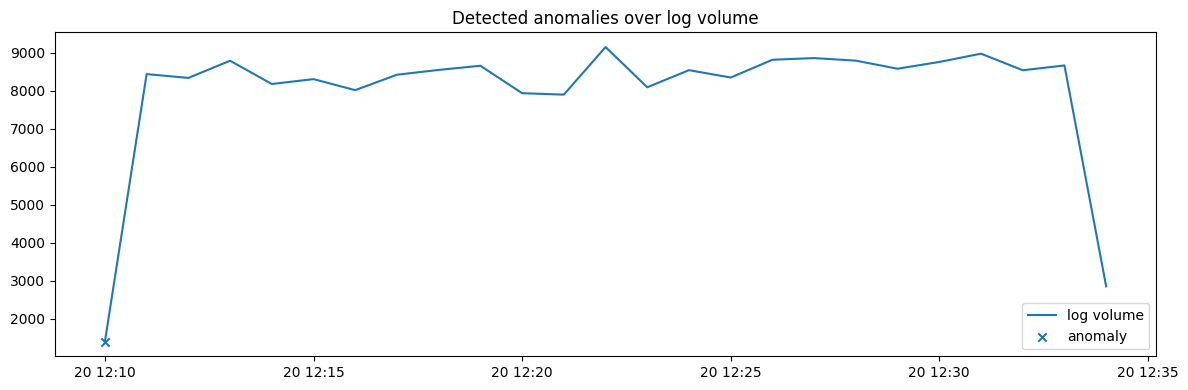

In [71]:
#Visual check: anomalies vs traffic volume
import matplotlib.pyplot as plt

# Total volume per window
total_volume = X.sum(axis=1)

plt.figure(figsize=(12, 4))
plt.plot(total_volume.index, total_volume.values, label="log volume")
if "is_anomaly" in results.columns:
    flagged = results.index[results["is_anomaly"]]
    plt.scatter(flagged, total_volume.loc[flagged], marker="x", label="anomaly")
plt.legend()
plt.title("Detected anomalies over log volume")
plt.tight_layout()